This notebook does some of the scatter plots, regressions, and PCA analyses from Herculano-Houzel (2015): Decreasing sleep requirement with increasing numbers of neurons as a driver for bigger brains and bodies in mammalian evolution

The data themselves were taken from the paper (Table 1) and entered into a Google doc: https://docs.google.com/spreadsheets/d/1RxptM7tVCtD3HRd2cJwxRa5j8M1vKzXziw9StXWPvA4/edit#gid=0
I downloaded the spreadsheet to a csv file in the local directory, named it `hh2015.csv`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore', Warning)

In [3]:
def load_data():
    # D/A is computed from D and A.
    # I also prefer O instead of O/N
    data = pd.read_csv('hh2015.csv')
    data = data.drop('D/A', axis=1)
    data['O'] = data['O/N'] * data['Ncx']
    data = data.drop('O/N', axis=1)
    return data
data = load_data()

# But, to do the analyses in the paper, I need D/A and O/N...
data['D/A'] = data['Dcx'] / data['Acx']
data['O/N'] = data['O'] / data['Ncx']
data.keys()


Index([u'Species', u'Order', u'brain mass', u'daily sleep', u'Ncx', u'Dcx',
       u'Acx', u'T', u'Mcx', u'O', u'D/A', u'O/N'],
      dtype='object')

In [4]:
data  # show the data table

,Species,Order,brain mass,daily sleep,Ncx,Dcx,Acx,T,Mcx,O,D/A,O/N
0,Aotus trivirgatus,Primate,15.750,16.97,442000000,47960,4428,1.670,7.396,592280000,10.831075,1.340
1,Callithrix sp.,Primate,7.780,10.22,245000000,54240,3068,1.331,4.084,272930000,17.679270,1.114
2,Cebus apella,Primate,52.508,5.95,1140000000,51080,15306,2.067,31.640,1260840000,3.337253,1.106
3,Saimiri sciureus,Primate,30.216,9.11,1340000000,80920,10500,1.333,13.992,1029120000,7.706667,0.768
4,Macaca mulatta,Primate,87.346,8.74,1710000000,32110,25000,1.714,42.860,3438810000,1.284400,2.011
5,Macaca radiata,Primate,61.470,9.02,1660000000,43810,16882,1.835,30.986,2121480000,2.595072,1.278
6,Papio cynocephalus,Primate,151.190,6.19,2880000000,33730,33378,2.177,72.668,3792960000,1.010546,1.317
7,Homo sapiens,Primate,1509.000,8.47,16300000000,21450,188100,2.938,552.700,24124000000,0.114035,1.480
8,Blarina brevicauda,Eulipotyphla,0.340,14.90,11900000,59280,218,0.821,0.179,11900000,271.926606,1.000
9,Caondylura cristata,Eulipotyphla,0.802,10.32,17300000,38780,363,1.072,0.389,33285200,106.831956,1.924


In [5]:
# Create a colormap, as used in Figure 2
colormap = dict(Primate='r', Eulipotyphla='y', Glires='g', 
                Afrotheria='b', Aritodactyla='c', Scandentia='k')
colors = [colormap[cls] for cls in data['Order']]

# Note that in figure 1, sleep and thickness
# are NOT log10. Code that here, so it's clean later.
def get_data(key):
    if key in ['T', 'daily sleep']:
        return data[key]
    else:
        return np.log10(data[key])

# Helper function to do a scatter plot and then label things.
def scatter(xkey, ykey):    
    plt.scatter(get_data(xkey), get_data(ykey), c=colors, s=100)
    plt.gca().set_xlabel(xkey)
    plt.gca().set_ylabel(ykey)


In [6]:
import scipy.stats
# Helper function to do the regression, 
# show the regression line, and show the rvalue.
def regressAndPlot(key1, key2):
    # Select rows without NaNs
    xvals, yvals = get_data(key1), get_data(key2)
    bad_idx = np.isnan(xvals + yvals)
    xvals, yvals = xvals[~bad_idx], yvals[~bad_idx]

    # Do the regression
    res = scipy.stats.linregress(xvals, yvals)
    
    # Plot with regression line and text.
    scatter(key1, key2)
    xlims = np.array([np.min(xvals), np.max(xvals)])
    ylims = np.array([np.min(yvals), np.max(yvals)])
    plt.gca().plot(xlims, res.slope * xlims + res.intercept)
    plt.gca().text(xlims[0 if res.rvalue > 0 else 1],
                   ylims[1],
                   '%.3f' % res.rvalue)
    
# Make a grid of plots; a bit cleaner than just plotting one-by-one.
def gridIt(all_xkeys, fn=regressAndPlot):
    all_xkeys = np.asarray(all_xkeys).T
    for pi in range(all_xkeys.size):
        plt.subplot(all_xkeys.shape[0], all_xkeys.shape[1], (pi + 1) % all_xkeys.size)
        regressAndPlot(all_xkeys.ravel()[pi], 'daily sleep')

/Library/Python/2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


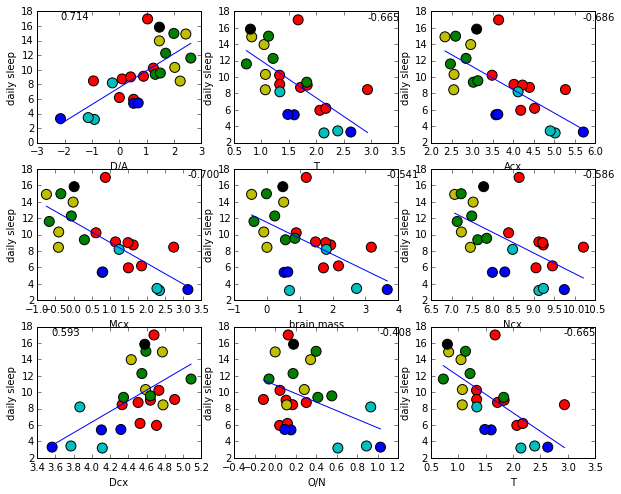

In [7]:
# Figure 1
plt.figure(figsize=(10, 8))
gridIt([['D/A', 'Mcx', 'Dcx'],
        ['T', 'brain mass', 'O/N'],
        ['Acx', 'Ncx', 'T']])


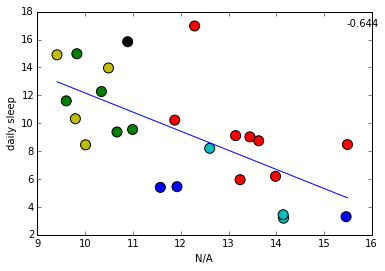

In [19]:
# I am not convinced that D/A is the right measure.
# For concentration yes, but perhaps time to clear metabolites
# depends on total neurons under a unit surface area
data['N/A'] = data['Ncx'] * data['Acx']
regressAndPlot('N/A', 'daily sleep')

In [9]:
# I'm interested in the PCA analysis.
# This function allows me to select some of the data,
# run PCA with it, and get some summary info.
#
# I can choose to zscore each column (to standardize scores)
# n_components is 2 by default, as that's what's in the paper.
def do_pca(cols, zscore=True, n_components=2):
    import sklearn.decomposition
    pca = sklearn.decomposition.PCA(whiten=False, n_components=n_components or len(cols))
    
    pca_data = np.asarray([get_data(col) for col in cols]).T
    print pca_data.shape
    idx = np.isnan(pca_data).sum(axis=1) == 0
    pca_data = pca_data[idx]  # remove nan
    if zscore:
        for k, col in enumerate(pca_data.T):
            pca_data[:, k] = scipy.stats.mstats.zscore(col)
    res = pca.fit_transform(pca_data)
    print cols
    print 'Total variance explained: ', pca.explained_variance_ratio_.sum()
    print 'Variance explained per component', pca.explained_variance_ratio_
    print pca.components_[0:2]
    print ''

In [10]:
# These are the two analyses in the paper.
do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx', 'T'])
do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx'])

(24, 6)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx', 'T']
Total variance explained:  0.894634529442
Variance explained per component [ 0.79312848  0.10150605]
[[-0.41965023 -0.44904225 -0.4455458   0.35506151  0.3385861  -0.42782526]
 [ 0.37161501  0.19352747  0.19593235  0.54339419  0.66878913  0.20857558]]

(24, 5)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx']
Total variance explained:  0.900127701593
Variance explained per component [ 0.78346539  0.11666231]
[[-0.4594903  -0.49166902 -0.4901551   0.39774265  0.38558916]
 [ 0.44448443  0.24779821  0.25928502  0.53998951  0.61823317]]



In [11]:
# What if we include more data?
data_keys = set(list(load_data().keys()))
data_keys = list(data_keys - set(['Species', 'Order']))
do_pca(data_keys)


(24, 8)
['Ncx', 'O', 'T', 'Dcx', 'Mcx', 'daily sleep', 'Acx', 'brain mass']
Total variance explained:  0.914651418351
Variance explained per component [ 0.82076893  0.09388249]
[[-0.3671566  -0.38401401 -0.36383187  0.26633536 -0.38738848  0.28702619
  -0.38524319 -0.36545168]
 [ 0.36120556  0.12682968  0.05651544  0.71957824  0.07556407  0.52299346
   0.08284249  0.21532066]]



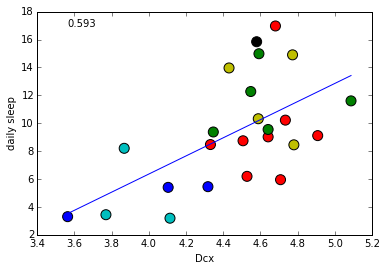

In [12]:
# Daily sleep and Dcx seem to pop out; A is unnecessary.
# How about a regression of D and sleep?
regressAndPlot('Dcx', 'daily sleep')

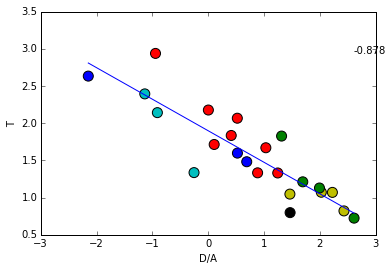

In [13]:
#log(D/A) and thickness correlate
regressAndPlot('D/A', 'T')